<a href="https://colab.research.google.com/github/mohdrab01/Machine-Learning-Lab-Tasks/blob/main/ML_Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML - Week 9 - 31-05-2021
# 18071A0591

---

## 1. Demonstrate Lasso Regression and Ridge Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn import datasets, linear_model

In [ ]:
n=200
diabetes = datasets.load_diabetes()
X = diabetes.data[:n]
y = diabetes.target[:n]

In [ ]:
ridge=linear_model.Ridge()
lasso = linear_model.Lasso()

In [ ]:
alphas = np.logspace(-2, 2, 10)

In [ ]:
# To see how well we learn, we partition the dataset into a training set with 150 
# as well as a test set with 50 examples. We record their errors respectively.
n_samples = 150
n_samples_train = 100
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]


In [ ]:
train_errors_ridge = list()
test_errors_ridge = list()
train_errors_lasso = list()
test_errors_lasso = list()

In [ ]:
# Initialize coeffficients for ridge regression and Lasso
coefs_ridge = []
coefs_lasso=[]

In [ ]:
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
    # Use the coefficient of determination R^2 as the performance of prediction.
    train_errors_ridge.append(ridge.score(X_train, y_train))
    test_errors_ridge.append(ridge.score(X_test, y_test))
    
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    train_errors_lasso.append(lasso.score(X_train, y_train))
    test_errors_lasso.append(lasso.score(X_test, y_test))

Text(0.5, 1.0, 'Ridge')

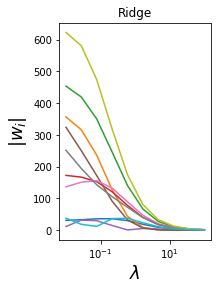

In [ ]:
# First see how the 10 features we learned scale as we change the regularization parameter
plt.subplot(1,2,1)
plt.semilogx(alphas, np.abs(coefs_ridge))
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('$|w_i|$',fontsize=18)
plt.title('Ridge')
#plt.savefig("Ridge_sparsity_scale.pdf.pdf")


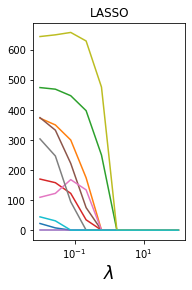

In [ ]:
plt.subplot(1,2,2)
plt.semilogx(alphas, np.abs(coefs_lasso))
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$',fontsize=18)
#plt.ylabel('$|\mathbf{w}|$',fontsize=18)
plt.title('LASSO')
#plt.savefig("LASSO_sparsity_scale.pdf")
plt.show()

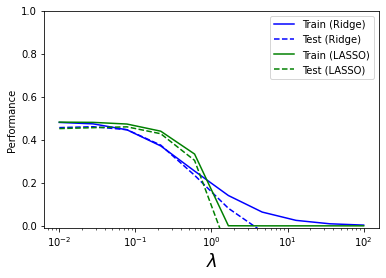

In [ ]:
# Plot our performance on both the training and test data
plt.semilogx(alphas, train_errors_ridge, 'b',label='Train (Ridge)')
plt.semilogx(alphas, test_errors_ridge, '--b',label='Test (Ridge)')
plt.semilogx(alphas, train_errors_lasso, 'g',label='Train (LASSO)')
plt.semilogx(alphas, test_errors_lasso, '--g',label='Test (LASSO)')
plt.legend(loc='upper right')
plt.ylim([-0.01, 1.0])
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('Performance')
#plt.savefig("Ridge_LASSO_sparsity_performance.pdf")
plt.show()

## 2. Pearson Correlation

In [ ]:
import pandas as pd

In [ ]:
x = pd.Series(range(10, 20))
y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
z = pd.Series([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])

In [ ]:
xy = pd.DataFrame({'x-values': x, 'y-values': y})
xy

,x-values,y-values
0,10,2
1,11,1
2,12,4
3,13,5
4,14,8
5,15,12
6,16,18
7,17,25
8,18,96
9,19,48


In [ ]:
xyz = pd.DataFrame({'x-values': x, 'y-values': y, 'z-values': z})
xyz

,x-values,y-values,z-values
0,10,2,5
1,11,1,3
2,12,4,2
3,13,5,1
4,14,8,0
5,15,12,-2
6,16,18,-8
7,17,25,-11
8,18,96,-15
9,19,48,-16


In [ ]:
x.corr(y)

0.7586402890911867

In [ ]:
u, u_with_nan = pd.Series([1, 2, 3]), pd.Series([1, 2, np.nan, 3])

In [ ]:
v, w = pd.Series([1, 4, 8]), pd.Series([1, 4, 154, 8])

In [ ]:
print(u.corr(v),u_with_nan.corr(w))

0.9966158955401239 0.9966158955401239


In [ ]:
corr_matrix = xy.corr()
corr_matrix

,x-values,y-values
x-values,1.00000,0.75864
y-values,0.75864,1.00000


In [ ]:
corr_matrix.at['x-values', 'y-values']

0.7586402890911869

In [ ]:
corr_matrix.iat[0, 1]

0.7586402890911869

In [ ]:
xyz.corr()

,x-values,y-values,z-values
x-values,1.000000,0.758640,-0.968072
y-values,0.758640,1.000000,-0.834079
z-values,-0.968072,-0.834079,1.000000


In [ ]:
xy.corrwith(z)

x-values   -0.968072
y-values   -0.834079
dtype: float64

## 3. t-SNE

In [ ]:
import numpy as np
import sklearn
from sklearn.manifold import TSNE 
from sklearn.datasets import load_digits 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
%matplotlib inline
import seaborn as sb

(1797, 64)


<Figure size 432x288 with 0 Axes>

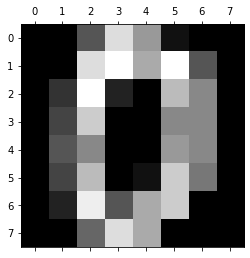

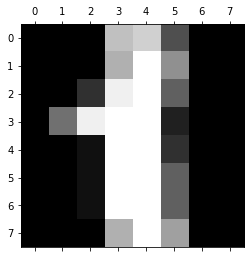

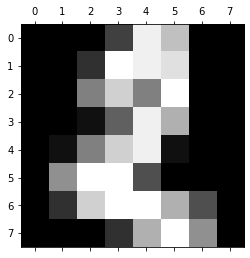

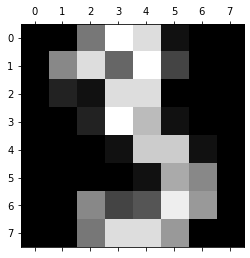

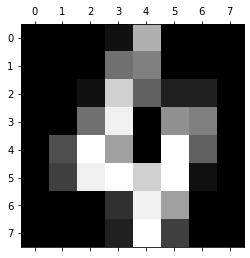

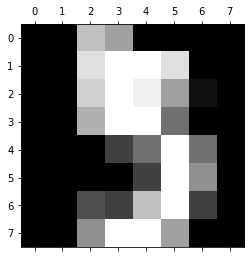

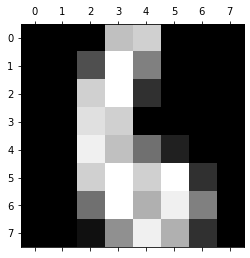

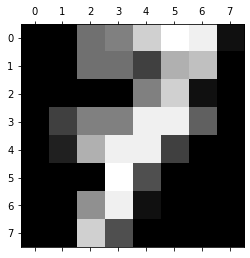

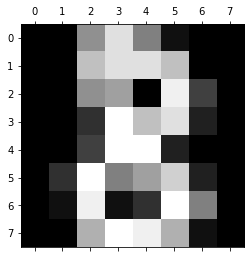

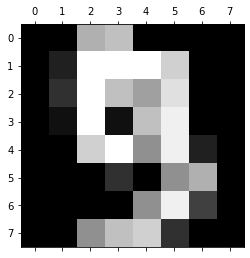

In [ ]:
digits = load_digits()
print(digits.data.shape) 
plt.gray()

#Displaying what the standard images look like
for i in range(0,10):
    plt.matshow(digits.images[i]) 
    plt.show()

In [ ]:
X = np.vstack([digits.data[digits.target==i] for i in range(10)])
Y = np.hstack([digits.target[digits.target==i] for i in range(10)])

In [ ]:
#Implementing the TSNE Function - ah Scikit learn makes it so easy!
digits_final = TSNE(perplexity=30).fit_transform(X) 

In [ ]:
def plot(x, colors):
  
    palette = np.array(sb.color_palette("hls", 10))  #Choosing color palette 

    # Create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    # Add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
        txts.append(txt)
    return f, ax, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(-46.31349, -33.6207, '0'),
  Text(2.952574, 10.242451, '1'),
  Text(48.340214, 11.25566, '2'),
  Text(37.08066, -24.106367, '3'),
  Text(-46.274036, 6.148192, '4'),
  Text(-7.8530397, -28.823395, '5'),
  Text(-30.6527, 45.453457, '6'),
  Text(8.288254, 42.18062, '7'),
  Text(14.987135, -3.1944833, '8'),
  Text(15.0565195, -39.518696, '9')])

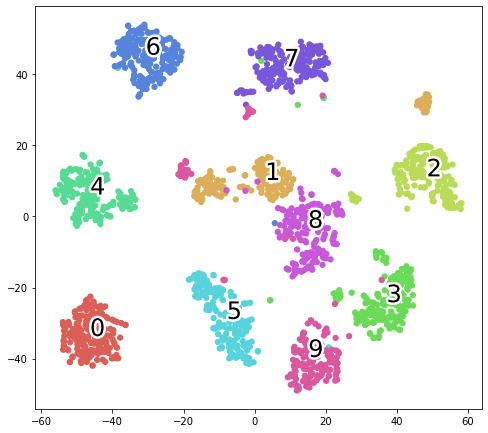

In [ ]:
plot(digits_final,Y)

## 4. Missing Value Ratio

In [ ]:
!wget https://raw.githubusercontent.com/bot13956/linear-discriminant-analysis-iris-dataset/master/iris.data.csv

--2021-05-31 09:28:26--  https://raw.githubusercontent.com/bot13956/linear-discriminant-analysis-iris-dataset/master/iris.data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [text/plain]
Saving to: ‘iris.data.csv’

iris.data.csv       100%[===================>]   4.44K  --.-KB/s    in 0s      

2021-05-31 09:28:26 (49.6 MB/s) - ‘iris.data.csv’ saved [4551/4551]



In [ ]:
data = pd.read_csv('iris.data.csv', header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [ ]:
data.isnull().sum()/len(data)*100

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [ ]:
# saving missing values in a variable
a = data.isnull().sum()/len(data)*100

In [ ]:
# saving column names in a variable
variables = data.columns

In [ ]:
# new variable to store variables having missing values less than a threshold
variable = [ ]
for i in range(data.columns.shape[0]):
    if a[i]<=40: #setting the threshold as 40%
        variable.append(variables[i])

In [ ]:
variable

[0, 1, 2, 3, 4]

In [ ]:
# creating a new dataframe using the above variables
new_data = data[variable]
new_data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
new_data.isnull().sum()/len(new_data)*100

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [ ]:
new_data.shape, data.shape

((150, 5), (150, 5))